# Data Wrangling Project - WeRateDogs

In this project, we will be wrangling the dataset of a tweet archive from Twitter user @dot_rates, also known as **WeRateDogs**. **WeRateDogs** is a Twitter account that rates people's dogs with a humorous comment about the dog. This user has over 4 million followers and received international media coverage.  There are four sections in this report, which are listed as below.

<ul>
    <li><a href="#gather">Gather</a></li>
    <li><a href="#assess">Assess</a></li>
    <li><a href="#clean">Clean</a></li>
    <li><a href="#analyze">Analyze</a></li>
</ul>

<a id='gather'></a>
## Gather

We gather three pieces of data of WeRateDogs Twitter Archive for this project. Each of these datsets are described below:

1. **The WeRateDogs Twitter archive**: This dataset is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. WeRateDogs has over 4 million followers and has received international media coverage.
2. **The tweet image predictions**: The dataset shows what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
3. **Each tweet's retweet and favorite counts**: The dataset contains retweet and favorite counts, which are retrieved by using using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. 

In [1]:
# import packages
import pandas as pd
import numpy as np

In [2]:
# read twitter archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# read image predictions
image_pred = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Retrieve data from Twitter by using Twitter API.

In [6]:
import tweepy

consumer_key = 'fKjv2nZdEB6xNz7ufz8EwLwyK'
consumer_secret = 'GwCEFkYSrfKa5HVtwNwdL3qwwCnXoUTZbWq6mvHkpiYoqwIHug'
access_token = '1147161157893001216-YuW6X9FJ50MqoZdxToMBHNjjtqJkG4'
access_secret = 'zaHUE9O7oVT87pX8VpVtY2Lk2mG2SXvul04qYyEYn83nK'

In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [8]:
import time
import json

In [9]:
# Twitter's rate limit
start = time.time()

data = {}
data['weRateDogs'] = []

for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        data['weRateDogs'].append({
            'tweet_id': str(tweet.id),
            'retweet_count': int(tweet.retweet_count),
            'fav_count': int(tweet.favorite_count)
        })
    except Exception as e:
        print('No tweet found for {} with error message {}'.format(str(tweet_id), str(e)))

end = time.time()
print(end - start)

No tweet found for 888202515573088257 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for 873697596434513921 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for 872668790621863937 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for 872261713294495745 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for 869988702071779329 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for 866816280283807744 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for 861769973181624320 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for 856602993587888130 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for 851953902622658560 with error message [{'code

Rate limit reached. Sleeping for: 684


No tweet found for 754011816964026368 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
No tweet found for 680055455951884288 with error message [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 691


1940.7156538963318


In [10]:
# store the retrieved data into tweet_json.txt
with open('tweet_json.txt', 'w') as outfile:
    json.dump(data, outfile)

Read `tweet_json.txt` file.

In [9]:
with open('tweet_json.txt', 'r') as json_file:
    data = json.load(json_file)

counts = pd.DataFrame(data=data['weRateDogs'], columns=['tweet_id', 'retweet_count', 'fav_count'])

<a id='assess'></a>
## Assess

In the cells below, we are going to examine the tidiness and quality of each dataset.

`twitter_archive` dataset includes the information of **tweet ID**, **reply status** (if the represented tweet is a reply), **source**, **content text**, **retweeted status** (if the represented tweet is a retweet), **url**, **rating**, and **dog stage**. 

In [10]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_archive['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [13]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

`image_pred` dataset includes the information of predicted dog breed of each image in the WeRateDogs Twitter archive. The table shows the top three predictions as well as the confidence of the prediction.

In [14]:
image_pred = pd.read_csv('image-predictions.tsv', sep='\t')

In [15]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
image_pred['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
Maltese_dog                   18
teddy                         18
Shetland_sheepdog             18
beagle                        18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

`counts` dataset contains the retrieved data of retweet and favorite counts of each tweet in the WeRateDogs Twitter archive.

In [17]:
counts.head()

,tweet_id,retweet_count,fav_count
0,892420643555336193,7722,36288
1,892177421306343426,5714,31290
2,891815181378084864,3785,23563
3,891689557279858688,7883,39584
4,891327558926688256,8499,37802


In [18]:
counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id         2331 non-null object
retweet_count    2331 non-null int64
fav_count        2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


#### Quality

***`twitter_archive` table***
- Missing expanded url information 
- Some dog stages contain two categories
- We don't need retweeted tweets in the dataset
- In reply status columns are redundant
- Retweeted status columns can be removed after filtering the original tweets
- Some denominators do not equal to 10
- Some numerators are incorrectly entered
- We only want tweets with image

***`image_pred`***
- Breed names mix with uppercase and lowercase.

#### Tidiness

- The variable of dog stage is divided into four columns.
- There should only be one table. First, the `counts` table only contains retweet and favorite counts. They seem to be the omissions from the `twitter_archive` table. Since we only want ratings that have images, we can merge `twitter_archive` and `image_predictions`. One is the original WeRateDogs archive including retweet and favorite counts, and the other one is the image prediction table. 
- Columns of `rating_numerator` and `rating_denominator` should be combined into one rating column.

<a id='clean'></a>
## Clean

In this section, we will address types of quality and tidiness issues listed in the previous section.

In [19]:
twitter_archive_clean = twitter_archive.copy()
image_pred_clean = image_pred.copy()
counts_clean = counts.copy()

### Missing Data

**1. `twitter_archive`: Missing `expanded_urls` data**

***Define***

Fill the missing url data with standard url and ID number. 

***Code***

In [20]:
twitter_archive_clean['expanded_urls'] = 'https://twitter.com/dog_rates/status/' + twitter_archive_clean['tweet_id'].astype('str') + '/photo/1'

***Test***

In [21]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Tidiness

**2. *Dog stage* variable is divided into four columns.**

***Define***

Create a `dog_stage` column which contains all stages in four columns and drop the redundant columns after creating `dog_stage`. 

***Code***

In [22]:
# replace None with empty cell
twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', '')
# combine four columns into one
twitter_archive_clean['dog_stage'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo']
# replace empty cell with None
twitter_archive_clean['dog_stage'].replace('', 'None', inplace = True)
# drop the four columns
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

In [23]:
twitter_archive_clean['dog_stage'].replace(['doggopupper', 'doggopuppo', 'doggofloofer'], 'dual', inplace = True)

***Test***

In [24]:
twitter_archive_clean.dog_stage.value_counts()

None       1976
pupper      245
doggo        83
puppo        29
dual         14
floofer       9
Name: dog_stage, dtype: int64

**3. We only want original tweets with images, and the image information is contained in another table. Also, retweet and favorite counts are seen as omissions from the `twitter_archive` table. Therefore, these three tables can be combined into one.**

***Define***

Combine three tables by ID numbers.

***Code***

In [25]:
twitter_all_clean = pd.concat([twitter_archive_clean, image_pred_clean, counts_clean], axis = 1, ignore_index = False)

twitter_all_clean = twitter_all_clean.loc[:,~twitter_all_clean.columns.duplicated()]

***Test***

In [26]:
twitter_all_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,fav_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,7722.0,36288.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,5714.0,31290.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,3785.0,23563.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,7883.0,39584.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,8499.0,37802.0


### Quality

**4. We only want original tweets**

***Define***

The retweets will be dropped from the dataset by detecting the rows where the `retweeted_status_id` is not null.

***Code***

In [27]:
twitter_all_clean = twitter_all_clean[twitter_all_clean['retweeted_status_id'].isnull()]

***Test***

In [28]:
twitter_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2175 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stage                     2175 non-null object
jpg_url                       1896 non-null object
img_num                       1896 non-null float64
p1                            1896 non-null object
p1_conf                       1896 no

**5. Since *reply tweets* are viewed as original tweets, the related columns are redundant in the dataset. In addition, *retweeted* columns can also be removed from the dataset since all retweets have been filtered out.**

***Define***

Remove all *reply* (`in_reply_to_status_id`, `in_reply_to_user_id`) and *retweet* (`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`) columns from the dataset.

***Code***

In [29]:
twitter_all_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
                       'retweeted_status_timestamp'], axis = 1, inplace = True);

***Test***

In [30]:
twitter_all_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,fav_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,7722.0,36288.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,5714.0,31290.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,3785.0,23563.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,7883.0,39584.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,8499.0,37802.0


**6. Some denominators are not 10**

***Define***

Change all non-10 denominators to be 10.

***Code***

In [31]:
twitter_all_clean['rating_denominator'] = 10

***Test***

In [32]:
twitter_all_clean['rating_denominator'].value_counts()

10    2175
Name: rating_denominator, dtype: int64

**7. Some numerators are incorrectly entered.**

***Define***

Replace all value greater than 15 with 15. 

***Code***

In [33]:
twitter_all_clean.loc[twitter_all_clean['rating_numerator'] > 15, 'rating_numerator'] = 15

***Test***

In [34]:
twitter_all_clean['rating_numerator'].value_counts()

12    500
10    442
11    426
13    307
9     156
8      98
7      54
14     43
5      36
6      32
15     26
3      19
4      17
2       9
1       8
0       2
Name: rating_numerator, dtype: int64

**8. We only want tweets with images.**

***Define***

Drop the rows without image by detecting the rows where its `jpg_url` is null.

***Code***

In [35]:
twitter_all_clean = twitter_all_clean[twitter_all_clean['jpg_url'].notnull()]

***Test***

In [36]:
twitter_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 2074
Data columns (total 22 columns):
tweet_id              1896 non-null int64
timestamp             1896 non-null object
source                1896 non-null object
text                  1896 non-null object
expanded_urls         1896 non-null object
rating_numerator      1896 non-null int64
rating_denominator    1896 non-null int64
name                  1896 non-null object
dog_stage             1896 non-null object
jpg_url               1896 non-null object
img_num               1896 non-null float64
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null object
p2                    1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-null object
p3                    1896 non-null object
p3_conf               1896 non-null float64
p3_dog                1896 non-null object
retweet_count         1896 non-n

In [37]:
twitter_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 2074
Data columns (total 22 columns):
tweet_id              1896 non-null int64
timestamp             1896 non-null object
source                1896 non-null object
text                  1896 non-null object
expanded_urls         1896 non-null object
rating_numerator      1896 non-null int64
rating_denominator    1896 non-null int64
name                  1896 non-null object
dog_stage             1896 non-null object
jpg_url               1896 non-null object
img_num               1896 non-null float64
p1                    1896 non-null object
p1_conf               1896 non-null float64
p1_dog                1896 non-null object
p2                    1896 non-null object
p2_conf               1896 non-null float64
p2_dog                1896 non-null object
p3                    1896 non-null object
p3_conf               1896 non-null float64
p3_dog                1896 non-null object
retweet_count         1896 non-n

**9. Breed names are inconsistent. It will be hard to count the total number of each dog breed.**

***Define***

Change all first letters to uppercase and replace "_" with space.

***Code***

In [38]:
twitter_all_clean['p1'] = twitter_all_clean['p1'].str.replace('_', ' ').str.capitalize();
twitter_all_clean['p2'] = twitter_all_clean['p2'].str.replace('_', ' ').str.capitalize();
twitter_all_clean['p3'] = twitter_all_clean['p3'].str.replace('_', ' ').str.capitalize();

***Test***

In [39]:
twitter_all_clean['p1'].value_counts()

Golden retriever             143
Labrador retriever            90
Pembroke                      78
Chihuahua                     77
Pug                           55
Chow                          41
Samoyed                       40
Toy poodle                    37
Pomeranian                    34
Malamute                      27
Cocker spaniel                27
French bulldog                24
Miniature pinscher            23
Chesapeake bay retriever      23
Seat belt                     20
German shepherd               19
Siberian husky                19
Staffordshire bullterrier     19
Cardigan                      19
Eskimo dog                    18
Beagle                        17
Web site                      17
Teddy                         16
Kuvasz                        15
Italian greyhound             15
Lakeland terrier              15
Maltese dog                   15
Rottweiler                    14
Great pyrenees                14
Shetland sheepdog             14
          

**10. We only need one column for ratings.**

***Define***

Create a new column to contain the values of dividing `numerator` by `denominator`. 

***Code***

In [40]:
# create new rating column
twitter_all_clean['rating'] = twitter_all_clean['rating_numerator'] / twitter_all_clean['rating_denominator']
# drop numerator and denominator columns
twitter_all_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1, inplace = True);

***Test***

In [41]:
twitter_all_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,fav_count,rating
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh springer spaniel,...,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True,7722.0,36288.0,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,Redbone,...,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True,5714.0,31290.0,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German shepherd,...,True,Malinois,0.138584,True,Bloodhound,0.116197,True,3785.0,23563.0,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian ridgeback,...,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True,7883.0,39584.0,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,Miniature pinscher,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,8499.0,37802.0,1.2


### Store Data to CSV File

In [42]:
twitter_all_clean.to_csv('twitter_archive_master.csv');

<a id='analyze'></a>
## Analyze

In this section, we will analyze the cleaned dataset and investigate our top interests of WeRateDogs twitter user.

### Populatiry of different dog stages

Some tweets in WeRateDogs contain dog stage, and there are four major stages with a few dual (might be incorrectly entered) stages. We are going to see which dog stage has the highest number of retweets and favorites. 

In [44]:
twitter_data = pd.read_csv('twitter_archive_master.csv')

In [45]:
stage_counts = twitter_data.groupby('dog_stage')[['retweet_count', 'fav_count']].mean()

In [46]:
stage_counts

,retweet_count,fav_count
dog_stage,,
None,2908.060567,8286.981959
doggo,2807.813333,7518.226667
dual,4129.750000,11766.916667
floofer,2518.444444,6066.888889
pupper,1958.687500,5603.861607
puppo,5525.541667,17029.250000


In [47]:
stage_counts.drop('None', axis = 0, inplace = True);

In [49]:
import matplotlib.pyplot as plt
import seaborn as sb

<Figure size 576x360 with 0 Axes>

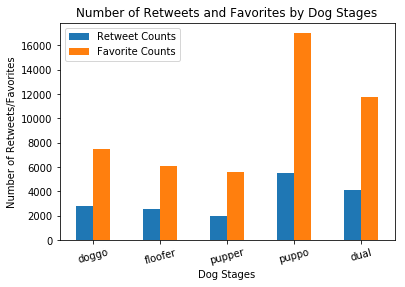

In [50]:
plt.figure(figsize = [8, 5])
stage_order = ['doggo', 'floofer', 'pupper', 'puppo', 'dual'];

stage_counts[['retweet_count','fav_count']].loc[stage_order].plot.bar();
plt.title('Number of Retweets and Favorites by Dog Stages');
plt.xlabel('Dog Stages');
plt.ylabel('Number of Retweets/Favorites');
plt.legend(['Retweet Counts', 'Favorite Counts']);
plt.xticks(rotation = 15);

According to the graph, we know that the tweets of puppy usually have more retweets/favorites, and the tweets with doggo lingo have the lowest number of retweets/favorites in average. 

### Ratings of different dog stages

Now, we will see the ratings for different dog stages. In order to enhance the difference, the values of rating will be 10 times larger in the figure. 

In [51]:
stage_rating = twitter_data.groupby('dog_stage')['rating'].mean()*10
stage_rating.drop('None', axis = 0, inplace = True)

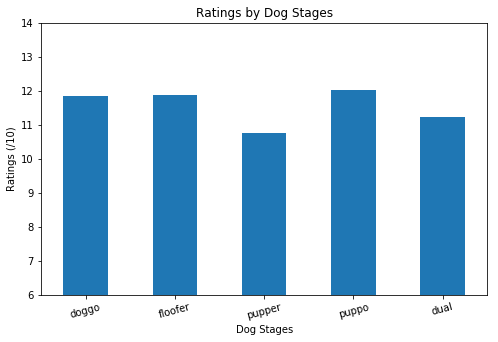

In [52]:
plt.figure(figsize = [8,5])

stage_rating.loc[stage_order].plot(kind = 'bar');
plt.title('Ratings by Dog Stages');
plt.xlabel('Dog Stages');
plt.ylabel('Ratings (/10)');
plt.xticks(rotation = 15);
plt.ylim(6, 14);

Although the number of retweets/favorites of *puppo* is significantly higher than the other stages, the average ratings are similar to *doggo* and *floofer*. The stage of *pupper* is still the least favorite among the others. 

### Popularity of different dog breeds

#1 prediction of breed prediction based on images generally has the higher confidence among all three predictions; therefore we assume that #1 breed prediction is the actual breed of dog in the tweet. 

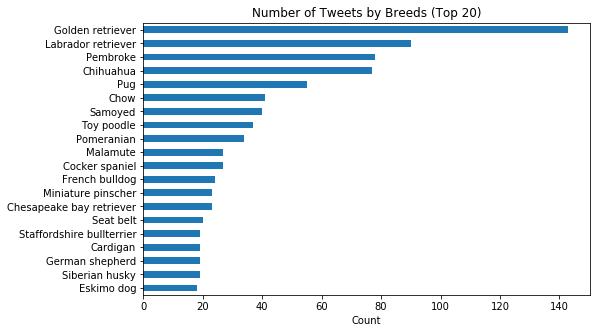

In [53]:
plt.figure(figsize = [8,5])
base_color = sb.color_palette()[0]

breed_tw_top20 = twitter_data['p1'].value_counts().sort_values(ascending = False).head(20);
breed_tw_top20.sort_values().plot(kind = 'barh', color = base_color);
plt.title('Number of Tweets by Breeds (Top 20)');
plt.xlabel('Count');

In [54]:
breed_counts = twitter_data.groupby('p1')[['retweet_count', 'fav_count']].mean()
breed_counts['combined'] = breed_counts['retweet_count'] + breed_counts['fav_count'];

<Figure size 720x720 with 0 Axes>

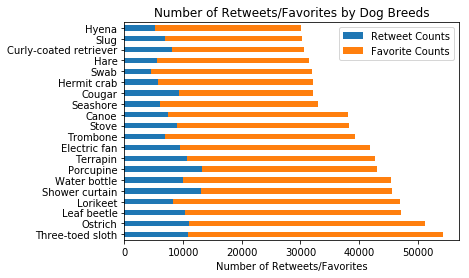

In [55]:
plt.figure(figsize = [10,10]);

breed_counts.sort_values("combined", ascending = False, inplace = True);
breed_top20 = breed_counts[0:20];
breed_top20[['retweet_count', 'fav_count']].plot(kind = 'barh', stacked=True);
plt.title('Number of Retweets/Favorites by Dog Breeds');
plt.xlabel('Number of Retweets/Favorites');
plt.ylabel('');
plt.legend(['Retweet Counts', 'Favorite Counts']);

In [56]:
for i in breed_tw_top20.index:
    if i in breed_top20.index:
        print(breed_top20.loc[i, index])
    else:
        print('None')

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


From the fist graph above, we can see that Golden Retriever, Labrador Retriever, Pembroke, Chihuahua, and Pug are the most common dog breed that shows on the tweet of WeRateDogs. However, these dog breeds generally do not have the most retweets and/or favorites among all breeds. None of the top 20 common breeds is on the list of top 20 tweets with most retweets/favorites. It might also be a kind of human behavior that people usually retweet/like a tweet when they see something rare. 